#### Programming for Data Analysis - Project. 

#### Author: Jack Caffrey

****
#### Problem statement 

Create a data set by simulating a real-world phenomenon of your choosing. Then, rather than collect datarelated to the phenomenon, you should model and synthesise such data using Python [1].

**** 

#### Project Background 

In a Manufacturing enviornment process classification and performance are vital to both company performance and customer satisfaction. A measure of this performance is OEE (Overall Equipment Effectiveness). The OEE concept is based off the following:   

   1. How often is the machine available to run?  
   2. How fast does it run when its running?  
   3. How many acceptable parts were produced?     
    
The above formula is calculated as : **** Availability x Performance X Quality (A x P x Q).****  [2]. 

Quality is a key area of focus for Continuous Improvement (C.I) in order to improve OEE performance. 

In order to establish a starting point for C.I projects it is necessary to determine current process capabilities. For the purpose of this project a rough guide is used to determine the ***Process Classification***. 

The term  ***Six sigma*** is loosely coined in this project to order process classification. 

Six Sigma classifies process under 7 categories: [3]. 

  1. Level 1 - % Yield of 31% & % defective 69%. 
  2. Level 2 - % Yield of 69% & % defective 31%.
  3. Level 3 - % Yield of 93.3% & % defective 6.7%.
  4. Level 4 - % Yield of 99.38% & % defective 0.62%.
  5. Level 5 - % Yield of 99.977% & % defective 0.023%.
  6. Level 6 - % Yield of 99.99966% & % defective 0.000034%.

The relationship between machine age **"Years in Production"** and defective product **"Units Scrapped"** produced from the machine is used in this instance to determine the six sigma classification. It is generally accepted that the **"Scrap Rate"** will increase as machine age.  

Any scrapped units are expected to negatively impact units shipped to customer. 

The above relationships will determine the direction used to assess and begin CI activites with the company across the 100 machines the Data is simulated for. 

Note: 

 * Pandas documentation was reffered to for all DataFrame construction - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html  
 * Seaborn & Matplotlib Documentation was reffered to for all plotting information - https://seaborn.pydata.org/ & https://matplotlib.org/

 
#### References: 
* [1] Project - Programming for Data Analysis, GMIT Project assignment. 
* [2] OEE, Six Sigma Material, https://www.six-sigma-material.com/OEE.html
* [3] Six Sigma, Wikipedia, https://en.wikipedia.org/wiki/Six_Sigma#
* [4] https://datatofish.com/if-condition-in-pandas-dataframe/
* [5] https://www.w3schools.com/python/python_conditions.asp

In [1]:
# importing the required libraries 
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
N = 280 # Batch Size for machines in Question
rng = np.random.default_rng() # initiate random number generator 

Machine = pd.DataFrame({"Years in Production": rng.integers(0,10, size=100), "Batches Produced": rng.integers(0, 10, size =100),}) # Used to create Data Frame

In [3]:
Machine ['Units Planned'] = Machine ['Batches Produced'] * N 

In [4]:
n1 = random.uniform(0, 0.0001) # Used to generate random values between 0 & 0.0001  
n2 = random.uniform(0, 0.05) # Used to generate random values between 0 & 0.05 
n3 = random.uniform(0, 0.1) # Used to generate random values between 0 & 0.1 

# Determine Scrap Rate dependant on machine age
Machine.loc[Machine["Years in Production"] <= 2, 'Scrap Rate'] =n1 
Machine.loc[Machine["Years in Production"] > 2, 'Scrap Rate'] = n2
Machine.loc[Machine["Years in Production"] >= 7, 'Scrap Rate'] = n3

In [5]:
Machine['Units Scrapped'] = Machine ['Units Planned'] * Machine ['Scrap Rate'] # Calculate Units Scrapped

In [6]:
Machine ['Units Shipped'] = Machine ['Units Planned'] - Machine ['Units Scrapped'] # Calculate Units Shipped

In [7]:
Machine ['Percentage Yield'] = Machine ["Units Shipped"] / Machine ["Units Planned"] # Calculate Percentage Yield 

In [8]:
# Define machine classifications 

Machine.loc[Machine['Units Shipped'] == 0, 'Process Classification'] = "Out of Service"
Machine.loc[Machine['Percentage Yield'] >= 0.31, 'Process Classification'] = "1 Sigma" 
Machine.loc[Machine['Percentage Yield'] >= 0.69, 'Process Classification'] = "2 Sigma"
Machine.loc[Machine['Percentage Yield'] >= 0.933, 'Process Classification'] = "3 Sigma" 
Machine.loc[Machine['Percentage Yield'] >= 0.9938, 'Process Classification'] = "4 Sigma" 
Machine.loc[Machine['Percentage Yield'] >= 0.99977, 'Process Classification'] = "5 Sigma"
Machine.loc[Machine['Percentage Yield'] >= 0.9999966, 'Process Classification'] = "6 Sigma"

In [9]:
Machine.round({'Units Scrapped':0,'Scrap Rate':7, 'Units Shipped':0,'Percentage Yield':7}) # Round values to required values and display DataFrame

,Years in Production,Batches Produced,Units Planned,Scrap Rate,Units Scrapped,Units Shipped,Percentage Yield,Process Classification
0,5,1,280,0.049991,14.0,266.0,0.950009,3 Sigma
1,1,4,1120,0.000089,0.0,1120.0,0.999911,5 Sigma
2,3,6,1680,0.049991,84.0,1596.0,0.950009,3 Sigma
3,0,4,1120,0.000089,0.0,1120.0,0.999911,5 Sigma
4,9,6,1680,0.027329,46.0,1634.0,0.972671,3 Sigma
...,...,...,...,...,...,...,...,...
95,0,5,1400,0.000089,0.0,1400.0,0.999911,5 Sigma
96,0,4,1120,0.000089,0.0,1120.0,0.999911,5 Sigma
97,9,0,0,0.027329,0.0,0.0,NaN,Out of Service
98,8,2,560,0.027329,15.0,545.0,0.972671,3 Sigma


In [10]:
print (Machine["Process Classification"].value_counts()) # Print Count of machine classifications 

3 Sigma           65
5 Sigma           28
Out of Service     7
Name: Process Classification, dtype: int64


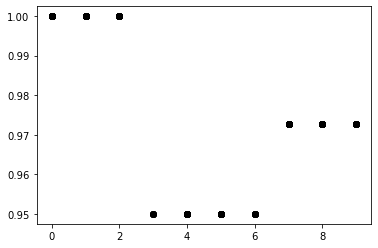

In [11]:
plt.scatter([Machine["Years in Production"]], [Machine["Percentage Yield"]], color='black'); # Display plots 

#### End